In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [8]:
import wget, os
dataset_url = "https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip"
if os.path.isfile('rockpaperscissors.zip'):
  print('File sudah tersedia')
else:
    wget.download(dataset_url, 'rockpaperscissors.zip')

File sudah tersedia


In [10]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = 'rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('')
zip_ref.close()

In [11]:
# Memisahkan dataset menjadi train (60%) dan validation (40%)
import splitfolders
input_folder = 'rockpaperscissors'
output_folder = 'dataset'
splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(0.6, 0.4))

Copying files: 2189 files [00:13, 167.73 files/s]


In [12]:
base_dir = 'dataset'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [13]:
os.listdir('dataset/train')

['paper', 'rock', 'rps-cv-images', 'scissors']

In [14]:
os.listdir('dataset/val')

['paper', 'rock', 'rps-cv-images', 'scissors']

In [15]:
# Data generator dengan augmentasi gambar
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

In [16]:
# Menggunakan flow_from_directory untuk mendapatkan data train dan validation
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(300, 200),
    batch_size=32,
    class_mode='categorical',
    classes=['rock', 'paper', 'scissors']
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(300, 200),
    batch_size=32,
    class_mode='categorical',
    classes=['rock', 'paper', 'scissors']
)


Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [18]:
# Membangun model sequential
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(300, 200, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 298, 198, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 149, 99, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 147, 97, 64)       18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 73, 48, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 71, 46, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 35, 23, 128)      

In [21]:
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
# Melatih model dengan data generator
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size
)

Epoch 1/5
41/41 [==============================] - 71s 2s/step - loss: 0.2537 - accuracy: 0.9139 - val_loss: 0.0759 - val_accuracy: 0.9850
Epoch 2/5
41/41 [==============================] - 71s 2s/step - loss: 0.2328 - accuracy: 0.9200 - val_loss: 0.0685 - val_accuracy: 0.9838
Epoch 3/5
41/41 [==============================] - 70s 2s/step - loss: 0.1665 - accuracy: 0.9459 - val_loss: 0.0729 - val_accuracy: 0.9803
Epoch 4/5
41/41 [==============================] - 71s 2s/step - loss: 0.2264 - accuracy: 0.9200 - val_loss: 0.0719 - val_accuracy: 0.9803
Epoch 5/5
41/41 [==============================] - 71s 2s/step - loss: 0.2283 - accuracy: 0.9200 - val_loss: 0.0606 - val_accuracy: 0.9850


In [26]:
# Menyimpan model setelah melatih
model.save('rockpaperscissors_model.keras')

In [27]:
# Memuat kembali model
from tensorflow.keras.models import load_model

loaded_model = load_model('rockpaperscissors_model.keras')

In [30]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

1/1 [==============================] - 0s 53ms/step
Hasil Prediksi: paper


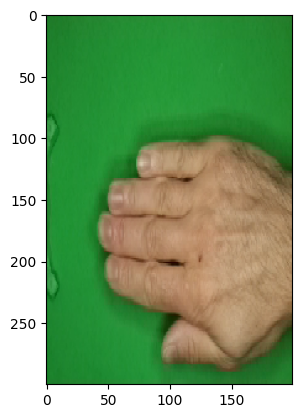

In [34]:
path_input = 'input_images/1oKnUgV2CdCaQUUX.png' # Ubah path sesuai dengan gambar input

# predicting images
img = image.load_img(path_input, target_size=(300,200))

imgplot = plt.imshow(img)
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalisasi

# Melakukan prediksi menggunakan model
predictions = model.predict(img_array)

# Menampilkan hasil prediksi
class_labels = train_generator.class_indices  # Mengambil kelas dari generator training
predicted_class = list(class_labels.keys())[np.argmax(predictions)]

print(f'Hasil Prediksi: {predicted_class}')
